**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [39]:
# write your code here

## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $C = (1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

In [40]:
import sympy as sm

alpha = sm.symbols('alpha')
kappa = sm.symbols('kappa')
nu = sm.symbols('nu')
w = sm.symbols('w')
wtilde = sm.symbols('omega')
tau = sm.symbols('tau')
C = sm.symbols('C')
G = sm.symbols('G')
L = sm.symbols('L')


In [41]:
objective = sm.log(C**alpha*G**(1-alpha))-nu*L**2/2
objective

-L**2*nu/2 + log(C**alpha*G**(1 - alpha))

In [42]:
constraint = sm.Eq(kappa+wtilde*L, C)
constraint

Eq(L*omega + kappa, C)

In [43]:
C_from_con = sm.solve(constraint, C)
C_from_con[0]

L*omega + kappa

In [44]:
objective_subs = objective.subs(C, C_from_con[0])
objective_subs

-L**2*nu/2 + log(G**(1 - alpha)*(L*omega + kappa)**alpha)

In [45]:
foc = sm.diff(objective_subs, L)
foc

G**(1 - alpha)*G**(alpha - 1)*alpha*omega/(L*omega + kappa) - L*nu

In [46]:
sol = sm.solve(sm.Eq(foc,0), L)
sol[1]

(-kappa*nu + sqrt(nu*(4*alpha*omega**2 + kappa**2*nu)))/(2*nu*omega)

**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

<lambdifygenerated-11>:2: RuntimeWarning: divide by zero encountered in true_divide
  return 0.5*(-32.0*sqrt(omega**2 + 0.0009765625) - 1.0)/omega


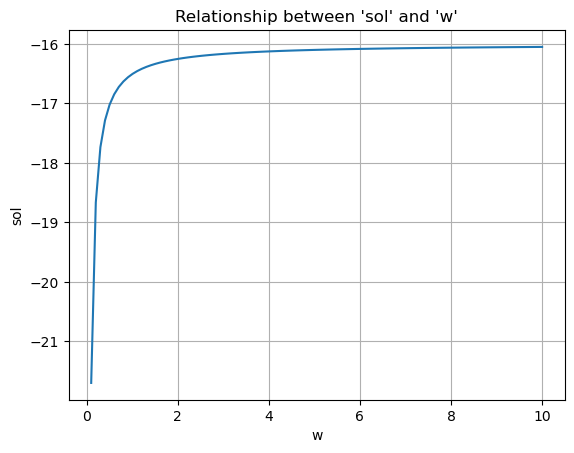

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sm

sol_func = sm.lambdify(args=(alpha, kappa, nu, wtilde),expr=sol[1])

# Define the parameter values
alpha = 0.5
kappa = 1.0
nu = 1 / (2 * 16 ** 2)
w = 1.0
tau = 0.30
wtilde = 0.7

# Define the symbols and equations
wtilde = sm.symbols('omega')
C = sm.symbols('C')
G = sm.symbols('G')
L = sm.symbols('L')

objective = sm.log(C ** alpha * G ** (1 - alpha)) - nu * L ** 2 / 2
constraint = sm.Eq(kappa + wtilde * L, C)

# Solve for C in terms of w and substitute in the objective function
C_from_con = sm.solve(constraint, C)
objective_subs = objective.subs(C, C_from_con[0])

# Compute the first-order condition and solve for L
foc = sm.diff(objective_subs, L)
sol = sm.solve(sm.Eq(foc, 0), L)

# Convert the symbolic expression to a numerical function
sol_fn = sm.lambdify(wtilde, sol[0])

# Create an array of w values
w_values = np.linspace(0, 10, 100)

# Evaluate the solution function for each w value
sol_values = sol_fn(w_values)

# Plot the relationship between w and sol
plt.plot(w_values, sol_values)
plt.xlabel('w')
plt.ylabel('sol')
plt.title("Relationship between 'sol' and 'w'")
plt.grid(True)
plt.show()





We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

In [48]:
# write your code here

A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{1-\sigma} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

In [49]:
# write your code here

**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

In [50]:
# write your code here  

## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

In [51]:
# write your code here

We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

In [52]:
# write your code here 

Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

In [53]:
# write your code here

**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

In [54]:
# write your code here


**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



In [55]:
# write your code here

## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [56]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

In [62]:
import numpy as np
from scipy.optimize import minimize

def griewank(x):
    return griewank_(x[0], x[1])

def griewank_(x1, x2):
    A = x1**2 / 4000 + x2**2 / 4000
    B = np.cos(x1 / np.sqrt(1)) * np.cos(x2 / np.sqrt(2))
    return A - B + 1

def refined_global_optimizer(bounds, tau, K_warmup, K_max):
    x_ast = None

    for k in range(K_max):
        x_k = np.random.uniform(bounds[0], bounds[1], size=2)

        if k >= K_warmup:
            chi_k = 0.50 * 2 / (1 + np.exp((k - K_warmup) / 100))
            x_k0 = chi_k * x_k + (1 - chi_k) * x_ast
        else:
            x_k0 = x_k

        result = minimize(griewank, x_k0, method='BFGS', tol=tau)
        x_k_ast = result.x

        if x_ast is None or griewank(x_k_ast) < griewank(x_ast):
            x_ast = x_k_ast

        if griewank(x_ast) < tau:
            break

        print(f"Iteration {k}: x_k0 = {x_k0}, f(x_k0) = {griewank(x_k0)}")

    return x_ast

# Set the settings
bounds = [-600, 600]
tau = 1e-8
K_warmup = 10
K_max = 1000

# Run the optimizer
global_optimum = refined_global_optimizer(bounds, tau, K_warmup, K_max)

print("Global Minimum:")
print("f(x_ast) = ", griewank(global_optimum))
print("x_ast = ", global_optimum)


Iteration 0: x_k0 = [ 354.29619466 -142.74725006], f(x_k0) = 38.17589412415801
Iteration 1: x_k0 = [-205.29996633  404.80553482], f(x_k0) = 52.07574583361529
Iteration 2: x_k0 = [ 574.89189515 -217.55474206], f(x_k0) = 94.46324186867706
Iteration 3: x_k0 = [-100.11083355  401.13175492], f(x_k0) = 43.164410362750985
Iteration 4: x_k0 = [-279.10502547   37.13828827], f(x_k0) = 21.196408949376963
Iteration 5: x_k0 = [ 362.67704181 -127.13790111], f(x_k0) = 37.86190410616047
Iteration 6: x_k0 = [ 524.32665467 -374.59019043], f(x_k0) = 105.33675940837418
Iteration 7: x_k0 = [369.47377425 530.7039148 ], f(x_k0) = 105.59069433118853
Iteration 8: x_k0 = [255.34696997 581.91550929], f(x_k0) = 101.31988115870571
Iteration 9: x_k0 = [-57.68734361 375.26547871], f(x_k0) = 36.991272193296155
Iteration 10: x_k0 = [-249.99894661  139.15065073], f(x_k0) = 21.59423779082545
Iteration 11: x_k0 = [-157.80211173  181.89351061], f(x_k0) = 16.23375666139699
Iteration 12: x_k0 = [-94.55890636 271.10908467], 

**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

In [63]:
import numpy as np
from scipy.optimize import minimize

def griewank(x):
    return griewank_(x[0], x[1])

def griewank_(x1, x2):
    A = x1**2 / 4000 + x2**2 / 4000
    B = np.cos(x1 / np.sqrt(1)) * np.cos(x2 / np.sqrt(2))
    return A - B + 1

def refined_global_optimizer(bounds, tau, K_warmup, K_max):
    x_ast = None

    for k in range(K_max):
        x_k = np.random.uniform(bounds[0], bounds[1], size=2)

        if k >= K_warmup:
            chi_k = 0.50 * 2 / (1 + np.exp((k - K_warmup) / 100))
            x_k0 = chi_k * x_k + (1 - chi_k) * x_ast
        else:
            x_k0 = x_k

        result = minimize(griewank, x_k0, method='BFGS', tol=tau)
        x_k_ast = result.x

        if x_ast is None or griewank(x_k_ast) < griewank(x_ast):
            x_ast = x_k_ast

        if griewank(x_ast) < tau:
            break

        print(f"Iteration {k}: x_k0 = {x_k0}, f(x_k0) = {griewank(x_k0)}")

    return x_ast

# Set the settings
bounds = [-600, 600]
tau = 1e-8
K_warmup = 10
K_max = 100  # Set K_max to 100

# Run the optimizer
global_optimum = refined_global_optimizer(bounds, tau, K_warmup, K_max)

print("Global Minimum:")
print("f(x_ast) = ", griewank(global_optimum))
print("x_ast = ", global_optimum)


Iteration 0: x_k0 = [-515.37027881 -432.51783266], f(x_k0) = 114.61652304744635
Iteration 1: x_k0 = [-27.34194113 132.87288971], f(x_k0) = 6.171307150313673
Iteration 2: x_k0 = [ 55.49847472 508.24780356], f(x_k0) = 66.18926150628722
Iteration 3: x_k0 = [ -6.58781124 372.54031222], f(x_k0) = 34.85603952188753
Iteration 4: x_k0 = [ 474.39217104 -472.92255025], f(x_k0) = 113.34792143201386
Iteration 5: x_k0 = [-167.27324293 -142.12599455], f(x_k0) = 13.763372623891525
Iteration 6: x_k0 = [ 203.3196042  -422.96350485], f(x_k0) = 55.54650468056858
Iteration 7: x_k0 = [424.17251216 225.11696501], f(x_k0) = 58.14417186405112
Iteration 8: x_k0 = [  -2.24006381 -143.82319296], f(x_k0) = 6.416076886008673
Iteration 9: x_k0 = [-536.31761712 -130.74040676], f(x_k0) = 77.04002833013499
Iteration 10: x_k0 = [-309.49180132 -205.81905909], f(x_k0) = 35.56006244846056
Iteration 11: x_k0 = [114.03424221 288.43901555], f(x_k0) = 25.624621773076967
Iteration 12: x_k0 = [218.57597984  98.55964857], f(x_k0